<a href="https://colab.research.google.com/github/kittikhun62/efficientnet_keras_transfer_learning/blob/master/Test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 653 (delta 143), reused 103 (delta 103), pack-reused 478
Receiving objects: 100% (653/653), 12.00 MiB | 20.37 MiB/s, done.
Resolving deltas: 100% (383/383), done.
/content/efficientnet_keras_transfer_learning


In [4]:
df = pd.read_csv (r'/content/drive/My Drive/data - new data.csv')
df

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico)
0,1,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,original,0-500,135.06,5
1,2,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom1,0-500,135.06,10
2,3,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom2,0-500,135.06,10
3,4,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom3,0-500,135.06,10
4,5,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom4,0-500,135.06,10
...,...,...,...,...,...,...,...,...,...
840,841,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom21,0-500,301.70,10
841,842,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom22,0-500,301.70,10
842,843,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom23,0-500,301.70,10
843,844,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom24,0-500,301.70,10


In [5]:
import sys
sys.path.append('/content/drive/My Drive/new/newdata_SEM1.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [6]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/new/newdata_SEM1.h5')
height = width = model.input_shape[1]

In [7]:
base_dir = '/content/drive/My Drive/new project'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [8]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, # image input 0-255 --> 0-1 เปลี่ยนค่าสี
      rotation_range=40,# หมุนภาพในองศา
      width_shift_range=0.2, #เปลี่ยนความกว้าง
      height_shift_range=0.2, #ปลี่ยนความสูง
      shear_range=0.2, #ทำให้ภาพเบี้ยว
      zoom_range=0.2, # Randomly zoom image
      horizontal_flip=True, 
      #โดย Default เมื่อมีการเลื่อนภาพ บิดภาพ หมุนภาพ จะเกิดพื้นที่ว่างที่มุม 
      #ซึ่งจะมีการเติมภาพให้เต็มโดยใช้เทคนิคแบบ Nearest neighbor ซึ่งเป็นการดึงสีบริเวณใหล้าเคียงมาระบายให้เต็ม แต่เราก็ยังสามารถกำหนดวิธีการ Fill ภาพด้วยเทคนิคอื่นได้จาก Parameter fill_mode
      fill_mode='nearest')
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( #การดึงภาพจาก Directory มาเข้าโมเดล 
        validation_dir,
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')
     

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 681 images belonging to 3 classes.
Found 107 images belonging to 3 classes.
{0: '0-500', 1: '1001-3200', 2: '501-1000'}


In [9]:
test = df[df['No'].between(756,845)] 
test

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico)
755,756,1-s2.0-S0925963522003363-main,Porous NiCoS nanosheets decorated activated ca...,"Shaofei Zhang, Jing Ren, Tao Gu,Hao Guo, Hongq...",/content/drive/My Drive/new train/1-s2.0-S0925...,zoom17,0-500,85.0,10
756,757,1-s2.0-S0925963522003363-main,Porous NiCoS nanosheets decorated activated ca...,"Shaofei Zhang, Jing Ren, Tao Gu,Hao Guo, Hongq...",/content/drive/My Drive/new train/1-s2.0-S0925...,zoom18,0-500,85.0,10
757,758,1-s2.0-S0925963522003363-main,Porous NiCoS nanosheets decorated activated ca...,"Shaofei Zhang, Jing Ren, Tao Gu,Hao Guo, Hongq...",/content/drive/My Drive/new train/1-s2.0-S0925...,zoom19,0-500,85.0,10
758,759,1-s2.0-S0925963522003363-main,Porous NiCoS nanosheets decorated activated ca...,"Shaofei Zhang, Jing Ren, Tao Gu,Hao Guo, Hongq...",/content/drive/My Drive/new train/1-s2.0-S0925...,zoom20,0-500,85.0,10
759,760,1-s2.0-S0925963522003363-main,Porous NiCoS nanosheets decorated activated ca...,"Shaofei Zhang, Jing Ren, Tao Gu,Hao Guo, Hongq...",/content/drive/My Drive/new train/1-s2.0-S0925...,zoom21,0-500,85.0,10
...,...,...,...,...,...,...,...,...,...
840,841,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom21,0-500,301.7,10
841,842,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom22,0-500,301.7,10
842,843,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom23,0-500,301.7,10
843,844,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom24,0-500,301.7,10


In [10]:
act = test['Class'].tolist()
path = test['path_Picture'].tolist()

In [11]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน 
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [12]:
import numpy as np


In [13]:
no = np.argmax(predict_image(path[0]))
labels[no]

1/1 [==============================] - 2s 2s/step


'0-500'

In [14]:
predict_image(path[1]) 

1/1 [==============================] - 0s 52ms/step


array([0.36313322, 0.5967614 , 0.0401053 ], dtype=float32)

In [15]:
np.argmax(predict_image(path[1]))

1/1 [==============================] - 0s 49ms/step


1

In [16]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

1/1 [==============================] - 0s 50ms/step


In [17]:
result

1

In [18]:
prob_list[0]
 

0.75610894

In [19]:
pred_list[0]

'0-500'

In [20]:

# data_train = valframe
# #เช็คคลาสใน Predicted
# pred_class = set(data_train['category_ov'])
# print('Predicted : ',len(pred_class))
# print(pred_class)
# print('-'*50)
# #เช็คคลาสใน Actual
# classe = set(data_train['class'])
# print('Actual : ',len(classe))
# print(classe)

In [21]:
pred = np.array(pred_list)
act = np.array(act)
     

In [22]:
act

array(['0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '0-500',
       '0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '1001-3200',
       '1001-3200', '1001-3200', '1001-3200', '1001-3200', '501-1000',
       '1001-3200', '1001-3200', '501-1000', '1001-3200', '1001-3200',
       '1001-3200', '1001-3200', '0-500', '501-1000', '501-1000',
       '1001-3200', '501-1000', '501-1000', '501-1000', '501-1000',
       '0-500', '0-500', '0-500', '0-500', '501-1000', '501-1000',
       '0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '0-500',
       '0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '0-500',
       '0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '0-500',
       '0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '0-500',
       '0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '0-500',
       '0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '0-500',
       '0-500', '0-500', '0-500', '0-500', '0-500', '0-500', '0-500',
       '0-500'], dtype=

In [23]:
pred

array(['0-500', '1001-3200', '0-500', '0-500', '0-500', '0-500',
       '1001-3200', '0-500', '1001-3200', '0-500', '1001-3200',
       '1001-3200', '0-500', '501-1000', '0-500', '0-500', '501-1000',
       '0-500', '1001-3200', '1001-3200', '1001-3200', '1001-3200',
       '1001-3200', '1001-3200', '1001-3200', '1001-3200', '1001-3200',
       '0-500', '1001-3200', '1001-3200', '0-500', '1001-3200',
       '1001-3200', '0-500', '1001-3200', '1001-3200', '1001-3200',
       '1001-3200', '0-500', '1001-3200', '1001-3200', '1001-3200',
       '1001-3200', '1001-3200', '1001-3200', '1001-3200', '1001-3200',
       '1001-3200', '1001-3200', '1001-3200', '1001-3200', '1001-3200',
       '0-500', '1001-3200', '1001-3200', '1001-3200', '1001-3200',
       '1001-3200', '1001-3200', '1001-3200', '1001-3200', '1001-3200',
       '1001-3200', '1001-3200', '1001-3200', '0-500', '1001-3200',
       '1001-3200', '1001-3200', '1001-3200', '1001-3200', '0-500',
       '1001-3200', '1001-3200', '1001-3

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 26.666666666666668%
              precision    recall  f1-score   support

       0-500       0.71      0.25      0.37        68
   1001-3200       0.11      0.58      0.18        12
    501-1000       0.00      0.00      0.00        10

    accuracy                           0.27        90
   macro avg       0.27      0.28      0.18        90
weighted avg       0.55      0.27      0.30        90



Text(0.5, 21.5, 'Predicted label')

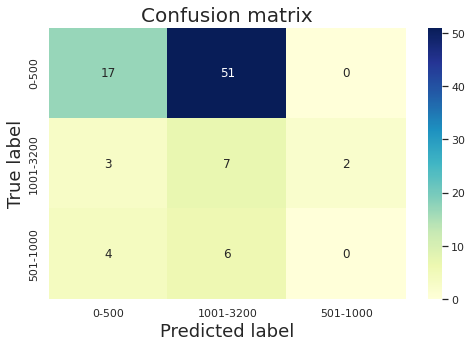

In [25]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)